# Mock dataset para causalidad

## Planteamiento del caso

Imagina que trabajamos en una empresa que proporciona algún tipo de suministro básico a los hogares. Cuando se detecta un cliente insatisfecho, como puede estar en riesgo de fuga, se le pasa a una unidad especial de Atención al Cliente, la Unidad de Recuperación. En función de una serie de variables socio-economico-cultural y del historico del cliente se decide si aplicarle una estrategia de recuperación o no. En algunos casos la intervención tiene exito y en otras no.

Nuestro objetivo es diseñar y crear un mock dataset replicando esta situación, al que luego aplicaremos diferentes estrategias para medir el efecto causal de la intervención. Estimaremos ATE, ATT y ATU usando métodos como IPW, matching y propensity scores con estratificación.

Empecemos identificando la forma que debe tener nuestro mock dataset. ¿Qué variables crees que podemos simular para componer este mock dataset?

## Diseño del *mock dataset*

Para simular un escenario realista en el que podamos estudiar el efecto causal de la “intervención” (Unidad de Recuperación) sobre la retención o fuga de clientes, necesitamos un conjunto de variables que reflejen tanto las características de los clientes como su contexto socioeconómico, su historial de relación con la empresa y la intervención misma.

A continuación se describe un ejemplo de cómo podría lucir la estructura del dataset y qué variables (columnas) podrían considerarse. Obviamente, se pueden añadir o quitar campos según la complejidad que deseemos.

1. Identificación del cliente

+ **customer_id**: Identificador único de cada cliente.

2. Variables sociodemográficas

+ **age**: Edad del cliente.
+ **gender**: Género (por ejemplo, codificado como M/F o similar).
+ **income_bracket**: Rango de ingresos (categorías como “bajo”, “medio”, “alto”).
+ **education_level**: Nivel educativo (por ejemplo, “Secundaria”, “Universitaria”, “Posgrado”).
+ **marital_status**: Estado civil (soltero, casado, etc.).
+ **household_size**: Número de personas en el hogar.


Estas variables influyen en la capacidad de pago, en la propensión a cambiar de proveedor, etc.

3. Variables geográficas y de contexto

+ **region**: Área geográfica o región (urbana, rural o incluso códigos de región más específicos).
+ **competitor_presence**: Podríamos crear un indicador o índice de cuánta competencia hay en esa región (un valor numérico o categórico que indique “Alta”, “Media”, “Baja”).

4. Variables relacionadas con la relación con la empresa

+ **tenure**: Antigüedad con la empresa (en meses o años).
+ **contract_type**: Tipo de contrato (por ejemplo, plan básico, plan premium, prepago/pospago, etc.).
+ **payment_method**: Método de pago (tarjeta, domiciliación bancaria, efectivo, etc.).
+ **payment_history**: Un indicador del historial de pagos (por ejemplo, número de retrasos en el último año, o proporción de pagos puntuales).
+ **monthly_consumption**: Consumo medio mensual del servicio (puede ser kWh en caso de luz, m³ en caso de agua o gas, etc.).
+ **customer_satisfaction_score**: Puntuación de satisfacción previa a la intervención (por ejemplo, de 1 a 10).
+ **complaints_last_year**: Número de quejas o incidencias registradas en el último año.

Estas variables ayudan a identificar a los clientes con mayor riesgo de fuga y a explicar cómo se decide la intervención.

5. Variables que determinan la insatisfacción/riesgo de fuga

+ **churn_risk_score**: Un “score” calculado internamente por la empresa para estimar la probabilidad de que el cliente abandone.
+ **flag_unsatisfied**: Variable booleana (0/1) que indica si el cliente ha manifestado claramente su insatisfacción o si la empresa lo ha marcado como en riesgo de fuga.

La empresa, basándose en estas y otras variables, decide si aplica la estrategia de recuperación.

6. Variable de tratamiento o intervención

+ **treatment**: Variable booleana (0/1) que indique si el cliente fue derivado a la Unidad de Recuperación y recibió la intervención.
+ **Importante** reflejar que la asignación no es aleatoria, sino que depende de los factores anteriores (edad, ingreso, riesgo de fuga, etc.).

7. Variables de resultado o “outcomes”

+ **churned**: Variable booleana (0/1) que indique si el cliente ha abandonado la empresa en el periodo de observación posterior.
+ (Opcional) **retention_time**: Tiempo (en meses) que el cliente se mantuvo tras la intervención (si queremos mayor granularidad).
+ (Opcional) **post_intervention_satisfaction**: Un nuevo score de satisfacción, medido tras un periodo de la intervención.

El outcome principal suele ser “churned” o “no churned”, pero podemos añadir otras medidas según el interés del análisis.

### Resumen de un posible diccionario de datos

+ **customer_id** (ID único, tipo: numérico o string)
+ **age** (tipo: numérico, rango 18–80 p.ej.)
+ **gender** (categoría: “M”, “F”, “Otro”)
+ **income_bracket** (categoría: “bajo”, “medio”, “alto”)
+ **education_level** (categoría: “Secundaria”, “Universitaria”, etc.)
+ **marital_status** (categoría: “Soltero”, “Casado”, etc.)
+ **household_size** (numérico, ej. 1–5)
+ **region** (categoría, ej. “Norte”, “Sur”, “Centro” o “Urbano/Rural”)
+ **competitor_presence** (numérico o categórico, ej. “Alta”, “Media”, “Baja”)
+ **tenure** (numérico, años o meses)
+ **contract_type** (categoría, p. ej. “Básico”, “Premium”, “Prepago”, etc.)
+ **payment_method** (categoría, p. ej. “Tarjeta”, “Domiciliación”, “Efectivo”)
+ **payment_history** (numérico, p.ej. número de retrasos o indicador de fiabilidad de pagos)
+ **monthly_consumption** (numérico, p.ej. kWh, m³, etc.)
+ **customer_satisfaction_score** (numérico, 1–10)
+ **complaints_last_year** (numérico, cuenta de incidencias)
+ **churn_risk_score** (numérico, 0–1 o 0–100)
+ **flag_unsatisfied** (booleano, 0/1)
+ **treatment** (booleano, 0/1)
+ **churned** (booleano, 0/1)
+ **post_intervention_satisfaction** (opcional, numérico, 1–10)
+ **retention_time** (opcional, numérico, meses)

## Cómo encaja esto con la estimación del efecto causal

1. **Tratamiento** (treatment) es la variable de interés (si se aplica la estrategia de recuperación o no).
2. **Outcome** (churned) es el resultado principal que queremos explicar.
3. **Covariables** (age, income_bracket, churn_risk_score, etc.) se utilizan para:
    + Explicar la probabilidad de ser tratado (propensity score).
    + Ajustar el modelo para aislar el efecto del tratamiento.
4. Con este dataset, podemos aplicar metodologías como:
    + **IPW** (Inverse Probability Weighting), utilizando un modelo de propensity score que calcule la probabilidad de recibir la intervención según las covariables.
    + **Matching** (Parear clientes tratados y no tratados con perfiles similares).
    + **Estratificación** por niveles de propensity score.
    + **Posteriormente**, estimar ATE, ATT y ATU.

## Consideraciones para  simular los datos

+ **Dependencias entre variables**: por ejemplo, esperamos que la edad, los ingresos y la región estén correlacionados con el churn_risk_score.
+ **Probabilidad de tratamiento**: la empresa no trata a todos los clientes en riesgo; tal vez tengan un umbral de churn_risk_score o un límite de capacidad en la Unidad de Recuperación.
+ **Efecto real del tratamiento**: en la simulación, podemos introducir un efecto “positivo” (reduce churn) con cierta probabilidad, manteniendo un nivel de ruido para simular los fracasos de la intervención.
+ **Tamaño muestral**: podemos decidir cuántos clientes simular (por ejemplo, 5.000 o 50.000) y definir distribuciones realistas (p. ej., Poisson, Normal, Binomial) para las distintas variables.

Con esto, tendremos un mock dataset suficientemente completo como para correr análisis de causalidad y estimar el impacto de la estrategia de recuperación en la retención de clientes.

## Estrategia para simular los datos

A continuación, se propone una posible estrategia para implementar la generación de un mock dataset con las características mencionadas, de forma que podamos después aplicar métodos de estimación de efectos causales (ATE, ATT, ATU) mediante IPW, matching y estratificación por propensity score.

La idea es definir un modelo generativo y simular paso a paso las distintas variables, incorporando correlaciones y sesgos que se asemejen a una situación real, en la que:

1. Los clientes tienen características socio-demográficas y económicas (edad, ingresos, región, etc.).
2. Se calcula un churn_risk_score y un flag_unsatisfied que determinan si el cliente puede entrar en la Unidad de Recuperación.
3. Se decide la asignación al tratamiento (treatment) en función de estas variables (no aleatoriamente).
4. Se observa un outcome (churned) que dependerá del riesgo de fuga y de si el cliente recibió intervención.

## Simulación de los datos

In [1]:
import numpy as np
import pandas as pd

# Fijamos semilla para reproducibilidad
np.random.seed(42)

# 1. Tamaño de la muestra
N = 10_000

# =============================================================================
# 2. Variables básicas (demográficas y socioeconómicas) = no condicionadas
# =============================================================================

# Edad (distribución normal truncada en [18, 80])
ages = np.random.normal(40, 12, size=N)
ages = np.clip(ages, 18, 80)  # truncamos a mínimo 18 y máximo 80

# Género (distribución categórica)
genders = np.random.choice(["M", "F", "Otro"], size=N, p=[0.48, 0.48, 0.04])

# Income bracket (bajo, medio, alto)
income_brackets = np.random.choice(["bajo", "medio", "alto"],
                                   size=N,
                                   p=[0.3, 0.5, 0.2])

# Región (urbano, rural)
regions = np.random.choice(["urbano", "rural"], size=N, p=[0.7, 0.3])

# Tamaño del hogar (1 a 5)
household_sizes = np.random.choice([1, 2, 3, 4, 5],
                                   size=N,
                                   p=[0.2, 0.3, 0.3, 0.15, 0.05])

# =============================================================================
# 3. Variables de relación con la empresa (con algo de correlación)
# =============================================================================

# Tenure (años con la compañía), correlacionado positivamente con la edad
tenure_noise = np.random.normal(0, 3, size=N)
tenure = 5 + 0.2*(ages - 40) + tenure_noise  # base lineal
tenure = np.clip(tenure, 0, 25)  # mínimo 0, máximo 25 años

# Payment_history (número de retrasos, 0 a 5 aprox.)
# mayor probabilidad de retraso si ingresos "bajo" o edad < 25
base_ph = ((income_brackets == "bajo").astype(int) +
           (ages < 25).astype(int))  # puede valer 0, 1 o 2
payment_history = np.random.poisson(lam=1 + base_ph, size=N)
payment_history = np.clip(payment_history, 0, 5)

# Monthly_consumption, mayor si ingresos altos y más personas en el hogar
income_factor = np.where(income_brackets == "alto", 1.2,
                 np.where(income_brackets == "medio", 1.0, 0.8))
monthly_consumption = 50*income_factor + 5*household_sizes
monthly_consumption += np.random.normal(0, 10, size=N)  # ruido
monthly_consumption = np.clip(monthly_consumption, 10, 300)

# Customer_satisfaction_score (1 a 10)
# sube con ingresos y baja con más retrasos
sat_base = 6 + (income_factor - 1.0)*1.5 - payment_history*0.5
customer_satisfaction_score = sat_base + np.random.normal(0, 1.5, size=N)
customer_satisfaction_score = np.clip(customer_satisfaction_score, 1, 10)

# Complaints_last_year (0, 1, 2, ...), mayor si satisfacción es baja y hay retrasos
complaints_lambda = 1.5 + 0.4*payment_history - 0.3*(customer_satisfaction_score - 5)
complaints_lambda = np.clip(complaints_lambda, 0.1, 5)
complaints_last_year = np.random.poisson(complaints_lambda, size=N)

# =============================================================================
# 4. Calcular churn_risk_score y flag_unsatisfied
# =============================================================================

# Servirá para:
#
# Decidir si un cliente se considera en riesgo de fuga.
# Decidir si se le aplica (o no) la intervención.

# Modelo lineal que combine satisfaction, quejas, retrasos y tenure
risk_linear = (-0.5*customer_satisfaction_score +
               0.3*complaints_last_year +
               0.2*payment_history -
               0.1*tenure +
               np.random.normal(0, 1, size=N))

def logistic(x):
    return 1 / (1 + np.exp(-x))

churn_risk_score = logistic(risk_linear)

# Flag de insatisfacción (1 si churn_risk_score > 0.6 o satisfacción < 4, por ej.)
flag_unsatisfied = ((churn_risk_score > 0.6) |
                    (customer_satisfaction_score < 4)).astype(int)

# =============================================================================
# 5. Asignación al tratamiento (treatment) de forma no aleatoria
# =============================================================================

# En nuestro escenario, no todos los clientes con flag_unsatisfied reciben 
# tratamiento. Puede haber una probabilidad condicional de tratamiento, basada 
# en capacidad de la Unidad de Recuperación, segmentación interna, etc.

# Probabilidad de tratamiento que depende de churn_risk_score e income_bracket
p_treatment = 0.5 * churn_risk_score
p_treatment += np.where(income_brackets == "alto", -0.1, 0.0)
p_treatment = np.clip(p_treatment, 0, 0.9)

# Sólo aplicamos el tratamiento si el cliente está insatisfecho
p_treatment = p_treatment * flag_unsatisfied

treatment = (np.random.rand(N) < p_treatment).astype(int)

# =============================================================================
# 6. Outcome: churned
# =============================================================================

# Queremos que el churn dependa del churn_risk_score, pero también que se reduzca 
# en cierto grado si se recibió el tratamiento.

# Suponemos que la prob de churn está dada por churn_risk_score,
# pero se reduce si hay tratamiento
treatment_effect = 0.2  # reducción del 20% en la prob. base
churn_prob = churn_risk_score.copy()
churn_prob[treatment == 1] *= (1 - treatment_effect)

churned = (np.random.rand(N) < churn_prob).astype(int)

# Con esta lógica sencilla, si un cliente recibe tratamiento, su probabilidad de 
# churn baja un 20% (relativo) respecto de lo que dictaba su churn_risk_score.

# =============================================================================
# 7. (Opcional) post_intervention_satisfaction
# =============================================================================
post_sat = customer_satisfaction_score + treatment - 0.5*churned
post_sat += np.random.normal(0, 0.5, size=N)
post_sat = np.clip(post_sat, 1, 10)

# =============================================================================
# 8. Construcción del DataFrame final
# =============================================================================
df = pd.DataFrame({
    "customer_id": range(N),
    "age": ages,
    "gender": genders,
    "income_bracket": income_brackets,
    "region": regions,
    "household_size": household_sizes,
    "tenure": tenure,
    "payment_history": payment_history,
    "monthly_consumption": monthly_consumption,
    "customer_satisfaction_score": customer_satisfaction_score,
    "complaints_last_year": complaints_last_year,
    "churn_risk_score": churn_risk_score,
    "flag_unsatisfied": flag_unsatisfied,
    "treatment": treatment,
    "churned": churned,
    "post_intervention_satisfaction": post_sat
})

# Muestra un vistazo a los datos
print(df.head(10))
print(df.describe(include='all'))


   customer_id        age gender income_bracket  region  household_size  \
0            0  45.960570      M           bajo  urbano               2   
1            1  38.340828      M          medio  urbano               3   
2            2  47.772262      M           alto  urbano               2   
3            3  58.276358      M          medio  urbano               1   
4            4  37.190160      F           bajo  urbano               2   
5            5  37.190357      M          medio  urbano               3   
6            6  58.950554      M          medio  urbano               2   
7            7  49.209217      F          medio   rural               3   
8            8  34.366307      M          medio  urbano               2   
9            9  46.510721      F           bajo  urbano               2   

      tenure  payment_history  monthly_consumption  \
0   8.005516                1            48.858802   
1   6.450702                0            56.754625   
2   7.502395

In [2]:
df.to_csv("simulated_data_1.csv", index=False)

Este DataFrame será el mock dataset que luego usaremos para:

1. Calcular y modelar la probabilidad de tratamiento (propensity score).
2. Aplicar técnicas de matching, IPW, estratificación, etc.
3. Estimar ATE, ATT y ATU comparando churned en grupos tratados y no tratados, controlando por covariables.

## Validar el resultado

+ Revisar estadísticas descriptivas (media, desviación, histogramas) para ver si los datos lucen razonables.
+ Verificar que haya proporciones suficientes de tratados/no tratados y churn en distintos niveles de churn_risk_score.
+ Ajustar parámetros (coeficientes en los modelos lineales, lambdas en Poisson, etc.) hasta obtener distribuciones que reflejen un escenario plausible.

In [3]:
df

,customer_id,age,gender,income_bracket,region,household_size,tenure,payment_history,monthly_consumption,customer_satisfaction_score,complaints_last_year,churn_risk_score,flag_unsatisfied,treatment,churned,post_intervention_satisfaction
0,0,45.960570,M,bajo,urbano,2,8.005516,1,48.858802,5.221074,4,0.038997,0,0,0,4.998959
1,1,38.340828,M,medio,urbano,3,6.450702,0,56.754625,6.088374,0,0.061097,0,0,0,5.751741
2,2,47.772262,M,alto,urbano,2,7.502395,1,70.299616,6.890282,2,0.011009,0,0,0,6.789393
3,3,58.276358,M,medio,urbano,1,11.838634,1,55.603568,5.125064,1,0.020738,0,0,0,5.011462
4,4,37.190160,F,bajo,urbano,2,6.836628,0,47.798866,7.249211,1,0.014520,0,0,0,8.209611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,55.613225,F,medio,urbano,4,5.085338,0,75.055422,5.735858,0,0.082550,0,0,0,5.956706
9996,9996,18.000000,F,medio,urbano,4,0.630427,3,62.622381,3.665672,7,0.603910,1,0,1,4.095678
9997,9997,31.536199,M,medio,rural,3,7.375893,2,58.757085,6.775811,2,0.069775,0,0,1,6.254580
9998,9998,45.949187,F,medio,urbano,2,6.614678,1,45.539655,4.503459,5,0.570584,0,0,1,4.826571


In [4]:
df.describe(include='all')

,customer_id,age,gender,income_bracket,region,household_size,tenure,payment_history,monthly_consumption,customer_satisfaction_score,complaints_last_year,churn_risk_score,flag_unsatisfied,treatment,churned,post_intervention_satisfaction
count,10000.00000,10000.000000,10000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,medio,urbano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4892,5020,7028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4999.50000,40.134692,NaN,NaN,NaN,2.539200,5.205085,1.396700,61.478021,5.265083,1.979700,0.170641,0.237300,0.042300,0.164200,5.228671
std,2886.89568,11.674506,NaN,NaN,NaN,1.113098,3.523520,1.262493,13.330286,1.666573,1.647167,0.200045,0.425449,0.201283,0.370475,1.742454
min,0.00000,18.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,13.670133,1.000000,0.000000,0.000337,0.000000,0.000000,0.000000,1.000000
25%,2499.75000,31.928914,NaN,NaN,NaN,2.000000,2.448665,0.000000,52.254610,4.129104,1.000000,0.030739,0.000000,0.000000,0.000000,4.046073
50%,4999.50000,39.968860,NaN,NaN,NaN,2.000000,5.053041,1.000000,61.525688,5.283438,2.000000,0.087342,0.000000,0.000000,0.000000,5.236369
75%,7499.25000,48.052971,NaN,NaN,NaN,3.000000,7.625276,2.000000,70.728118,6.418010,3.000000,0.233438,0.000000,0.000000,0.000000,6.418951


El `churn_risk_score` varía entre:

In [8]:
df['churn_risk_score'].describe(include='all')

count    10000.000000
mean         0.170641
std          0.200045
min          0.000337
25%          0.030739
50%          0.087342
75%          0.233438
max          0.988214
Name: churn_risk_score, dtype: float64

In [15]:
# Quantiles
df['churn_risk_score'].quantile([0.0, 0.5, 1.0])

0.0    0.000337
0.5    0.087342
1.0    0.988214
Name: churn_risk_score, dtype: float64

In [14]:
# Average
df['churn_risk_score'].mean()

np.float64(0.1706405298982108)

<Axes: ylabel='Frequency'>

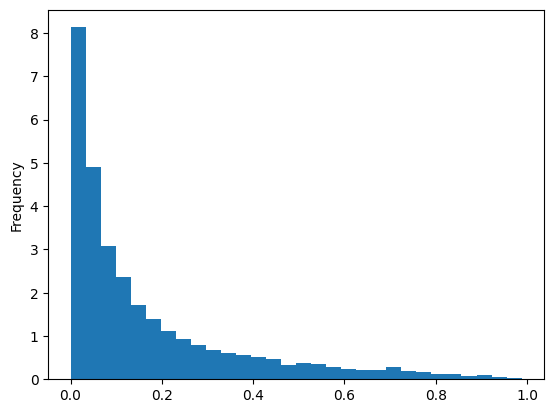

In [10]:
# Histogram of df['churn_risk_score']with density
df['churn_risk_score'].plot.hist(density=True, bins=30)

In [13]:
df.groupby('treatment')['churn_risk_score'].quantile([0.0, 0.5, 1.0]) * -0.2

treatment     
0          0.0   -0.000067
           0.5   -0.016122
           1.0   -0.197507
1          0.0   -0.004641
           0.5   -0.120556
           1.0   -0.197643
Name: churn_risk_score, dtype: float64

In [11]:
# Disminución esperada del churn
df.groupby('treatment')['churn_risk_score'].mean() * -0.2

treatment
0   -0.030604
1   -0.113927
Name: churn_risk_score, dtype: float64